# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 592


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat =  city_weather["coord"]["lat"] 
        city_lng =  city_weather["coord"]["lon"]
        city_max_temp =  city_weather["main"] ["temp_max"]
        city_humidity =  city_weather["main"]["humidity"] 
        city_clouds =  city_weather["clouds"]["all"]
        city_wind =  city_weather["wind"]["speed"] 
        city_country =  city_weather["sys"]["country"] 
        city_date =  city_weather["dt"] 

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bethel
Processing Record 2 of Set 1 | olonkinbyen
Processing Record 3 of Set 1 | waitangi
Processing Record 4 of Set 1 | pokrovsk
Processing Record 5 of Set 1 | ketchikan
Processing Record 6 of Set 1 | port-aux-francais
Processing Record 7 of Set 1 | acarau
Processing Record 8 of Set 1 | edinburgh of the seven seas
Processing Record 9 of Set 1 | anadyr
Processing Record 10 of Set 1 | al-`ula
City not found. Skipping...
Processing Record 11 of Set 1 | igabi
Processing Record 12 of Set 1 | port mathurin
Processing Record 13 of Set 1 | khandyga
Processing Record 14 of Set 1 | adamstown
Processing Record 15 of Set 1 | hermanus
Processing Record 16 of Set 1 | grytviken
Processing Record 17 of Set 1 | puerto ayora
Processing Record 18 of Set 1 | kerikeri
Processing Record 19 of Set 1 | posse
Processing Record 20 of Set 1 | hoxtolgay
City not found. Skipping...
Processing Record 21 of Set 1 | iqaluit
Pr

Processing Record 39 of Set 4 | newman
Processing Record 40 of Set 4 | kirando
Processing Record 41 of Set 4 | leninogorsk
Processing Record 42 of Set 4 | punta del este
Processing Record 43 of Set 4 | fannuj
City not found. Skipping...
Processing Record 44 of Set 4 | sosnogorsk
Processing Record 45 of Set 4 | tilisarao
Processing Record 46 of Set 4 | haiku-pauwela
Processing Record 47 of Set 4 | kenai
Processing Record 48 of Set 4 | fortuna
Processing Record 49 of Set 4 | tucurui
Processing Record 0 of Set 5 | oranjemund
Processing Record 1 of Set 5 | villa gesell
Processing Record 2 of Set 5 | cochituate
Processing Record 3 of Set 5 | labytnangi
Processing Record 4 of Set 5 | tindouf
Processing Record 5 of Set 5 | hobyo
Processing Record 6 of Set 5 | jodiya bandar
Processing Record 7 of Set 5 | happy valley-goose bay
Processing Record 8 of Set 5 | vrangel'
Processing Record 9 of Set 5 | keflavik
Processing Record 10 of Set 5 | port alfred
Processing Record 11 of Set 5 | moanda
Proces

Processing Record 29 of Set 8 | patong
Processing Record 30 of Set 8 | san miguel
Processing Record 31 of Set 8 | boju
Processing Record 32 of Set 8 | patterson
Processing Record 33 of Set 8 | ruteng
Processing Record 34 of Set 8 | port blair
Processing Record 35 of Set 8 | kinkala
Processing Record 36 of Set 8 | mirny
Processing Record 37 of Set 8 | bengkulu
Processing Record 38 of Set 8 | nelidovo
Processing Record 39 of Set 8 | montego bay
Processing Record 40 of Set 8 | basna
Processing Record 41 of Set 8 | jiazi
Processing Record 42 of Set 8 | nemuro
Processing Record 43 of Set 8 | fonte boa
Processing Record 44 of Set 8 | new norfolk
Processing Record 45 of Set 8 | ta`u
Processing Record 46 of Set 8 | pollachi
Processing Record 47 of Set 8 | argentan
Processing Record 48 of Set 8 | recani
Processing Record 49 of Set 8 | casas grandes
Processing Record 0 of Set 9 | petrozavodsk
Processing Record 1 of Set 9 | phan rang-thap cham
Processing Record 2 of Set 9 | tralee
Processing Reco

Processing Record 19 of Set 12 | altay
Processing Record 20 of Set 12 | wynyard
Processing Record 21 of Set 12 | naama
Processing Record 22 of Set 12 | tranovaho
City not found. Skipping...
Processing Record 23 of Set 12 | diebougou
Processing Record 24 of Set 12 | toliara
Processing Record 25 of Set 12 | noumea
Processing Record 26 of Set 12 | famagusta
Processing Record 27 of Set 12 | hun
Processing Record 28 of Set 12 | moscow
Processing Record 29 of Set 12 | kontagora
Processing Record 30 of Set 12 | ingeniero jacobacci
Processing Record 31 of Set 12 | lompoc
Processing Record 32 of Set 12 | freeport
Processing Record 33 of Set 12 | hami
Processing Record 34 of Set 12 | asau village
City not found. Skipping...
Processing Record 35 of Set 12 | gordonvale
Processing Record 36 of Set 12 | shambu
Processing Record 37 of Set 12 | abu dhabi
Processing Record 38 of Set 12 | arroyito
Processing Record 39 of Set 12 | luimneach
Processing Record 40 of Set 12 | bahia de kino
Processing Record

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          564
Lat           564
Lng           564
Max Temp      564
Humidity      564
Cloudiness    564
Wind Speed    564
Country       564
Date          564
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bethel,41.3712,-73.4140,24.00,87,100,0.67,US,1688946834
1,olonkinbyen,70.9221,-8.7187,2.56,96,100,10.38,SJ,1688946834
2,waitangi,-43.9535,-176.5597,11.01,88,99,5.36,NZ,1688946835
3,pokrovsk,48.2820,37.1758,15.39,87,100,6.11,UA,1688946835
4,ketchikan,55.3422,-131.6461,18.26,68,20,6.17,US,1688946296


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bethel,41.3712,-73.4140,24.00,87,100,0.67,US,1688946834
1,olonkinbyen,70.9221,-8.7187,2.56,96,100,10.38,SJ,1688946834
2,waitangi,-43.9535,-176.5597,11.01,88,99,5.36,NZ,1688946835
3,pokrovsk,48.2820,37.1758,15.39,87,100,6.11,UA,1688946835
4,ketchikan,55.3422,-131.6461,18.26,68,20,6.17,US,1688946296


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

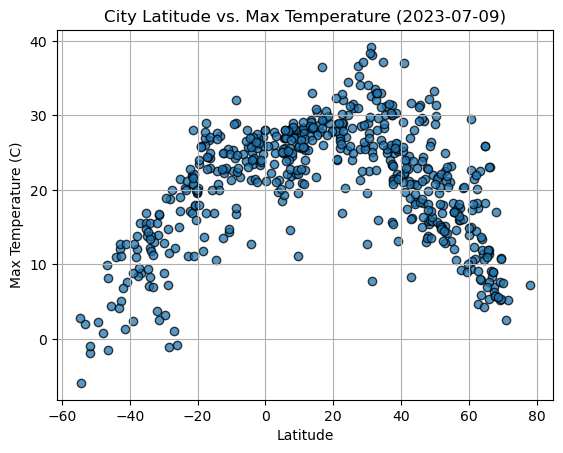

In [12]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values,y_values,edgecolors="black",alpha=0.75)

# Determining date from data for displaying in plot
from datetime import datetime
date = datetime.utcfromtimestamp(city_data_df["Date"][0]).strftime("%Y-%m-%d")
# Incorporate the other graph properties
title = f"City Latitude vs. Max Temperature ({date})"
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title(title)
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

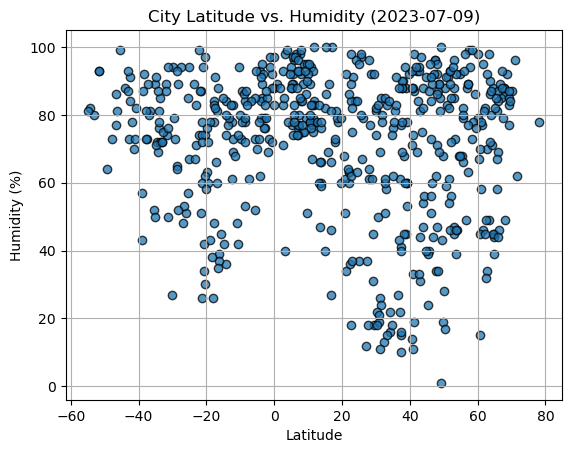

In [13]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
plt.scatter(x_values,y_values,edgecolors="black",alpha=0.75)


# Incorporate the other graph properties
title = f"City Latitude vs. Humidity ({date})"
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(title)
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

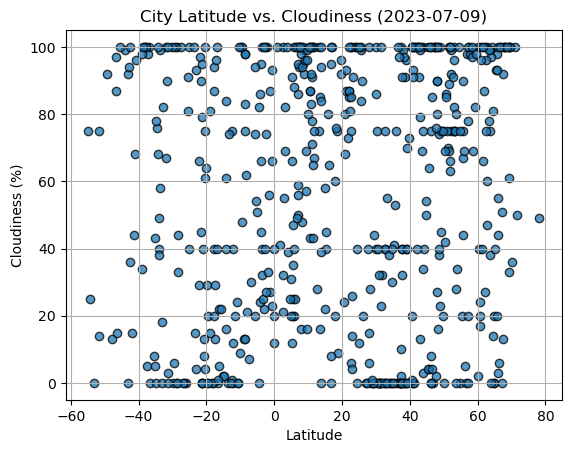

In [14]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
plt.scatter(x_values,y_values,edgecolors="black",alpha=0.75)

# Incorporate the other graph properties
title = f"City Latitude vs. Cloudiness ({date})"
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(title)
plt.grid()


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

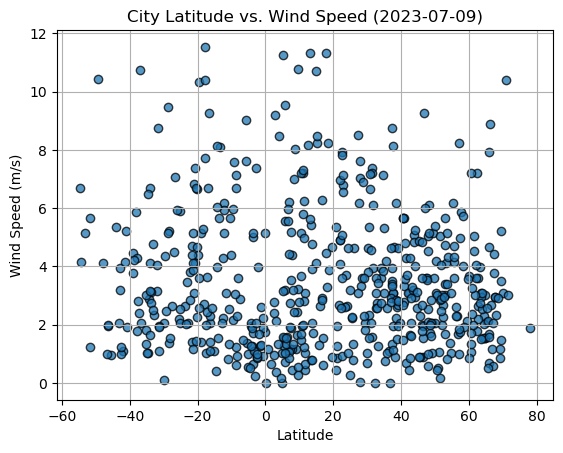

In [15]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
plt.scatter(x_values,y_values,edgecolors="black",alpha=0.75)

# Incorporate the other graph properties
title = f"City Latitude vs. Wind Speed ({date})"
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title(title)
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [16]:
# Define a function to create Linear Regression plots
def line_regress_func(x,y,label_x,label_y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    plt.scatter(x,y)
    plt.plot(x,regress_values,"r-")
    print(f"The r-value is: {rvalue}")
    plt.xlabel(label_x)
    plt.ylabel(label_y)
    return line_eq

In [17]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bethel,41.3712,-73.4140,24.00,87,100,0.67,US,1688946834
1,olonkinbyen,70.9221,-8.7187,2.56,96,100,10.38,SJ,1688946834
3,pokrovsk,48.2820,37.1758,15.39,87,100,6.11,UA,1688946835
4,ketchikan,55.3422,-131.6461,18.26,68,20,6.17,US,1688946296
8,anadyr,64.7500,177.4833,18.28,45,20,3.00,RU,1688946836


In [18]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] <0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,waitangi,-43.9535,-176.5597,11.01,88,99,5.36,NZ,1688946835
5,port-aux-francais,-49.3500,70.2167,2.27,64,92,10.44,TF,1688946836
6,acarau,-2.8856,-40.1200,26.10,79,22,7.38,BR,1688946836
7,edinburgh of the seven seas,-37.0676,-12.3116,15.57,80,100,10.74,SH,1688946836
10,port mathurin,-19.6833,63.4167,23.52,63,29,10.31,MU,1688946838


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.6195558209671476


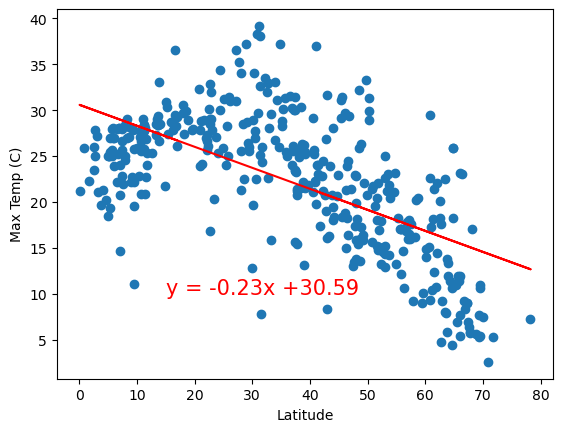

In [20]:
# Linear regression on Northern Hemisphere
line_eq = line_regress_func(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"],"Latitude","Max Temp (C)")
plt.annotate(line_eq,(15,10),fontsize=15,color="red")
plt.show()

The r-value is: 0.8158380561621764


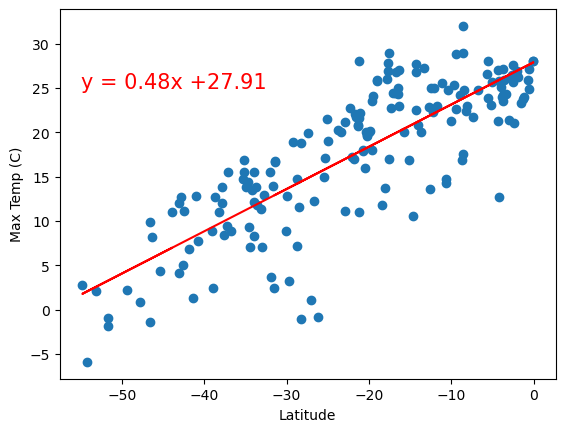

In [21]:
# Linear regression on Southern Hemisphere
line_eq=line_regress_func(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"],"Latitude","Max Temp (C)")
plt.annotate(line_eq,(-55,25),fontsize=15,color="red")
plt.show()

**Discussion about the linear relationship:** 
- Max temp has a negative linear relation with Latitudes in the Northern Hemisphere i.e the max temp decreases with increasing latitudes since the liner relation has a negative slope 
- Max temp has a positive liner relation with Latitudes in the Southern Hemisphere i.e. the max temp increases with increasing latitudes since the liner relation has a positive slope
- The r^2 values are also 0.4 and 0.6 respectively.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: -0.11003926542443779


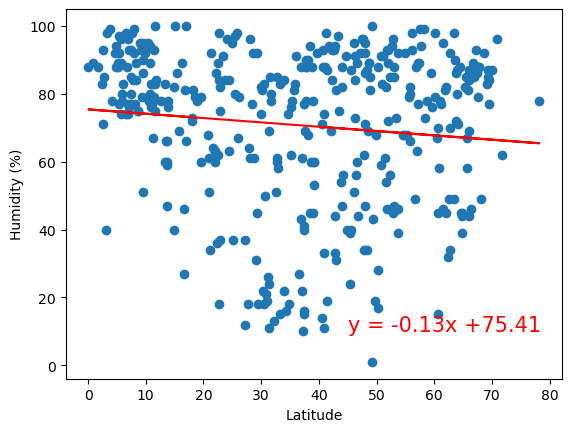

In [22]:
# Northern Hemisphere
line_eq=line_regress_func(northern_hemi_df["Lat"], northern_hemi_df["Humidity"],"Latitude","Humidity (%)")
plt.annotate(line_eq,(45,10),fontsize=15,color="red")
plt.show()

The r-value is: -0.019564048411703734


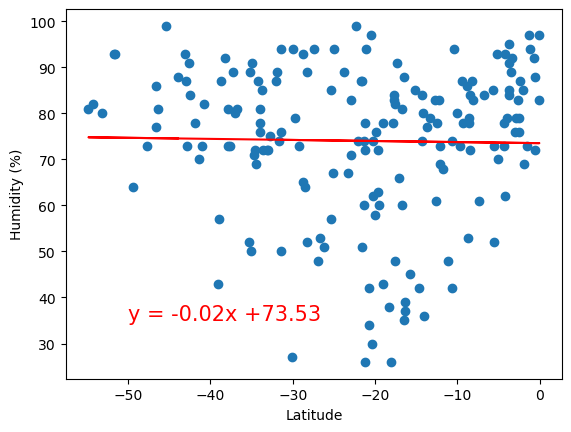

In [24]:
# Southern Hemisphere
line_eq=line_regress_func(southern_hemi_df["Lat"], southern_hemi_df["Humidity"],"Latitude","Humidity (%)")
plt.annotate(line_eq,(-50,35),fontsize=15,color="red")
plt.show()

**Discussion about the linear relationship:** 
- Since there is a very tiny slope and r value (both negative) and humidity somewhere between 70 and 75% for this relation for both northern and southern hemispheres, the humidity does not show significant linear variation with latitude values. Although it looks like hiumidity is decreasing with latitudes in both cases there r^2 values are also very small showing that the line is not a great fit either

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: -0.005315368777162154


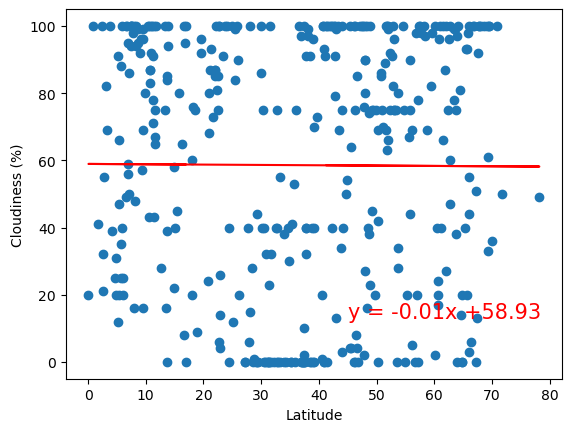

In [25]:
# Northern Hemisphere
line_eq=line_regress_func(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"],"Latitude","Cloudiness (%)")
plt.annotate(line_eq,(45,13),fontsize=15,color="red")
plt.show()

The r-value is: -0.08616882037607844


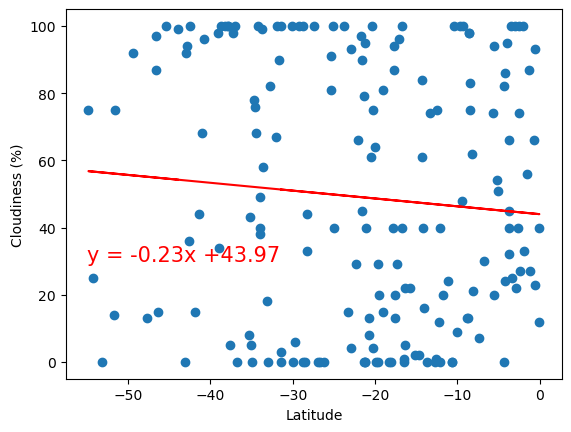

In [26]:
# Southern Hemisphere
line_eq=line_regress_func(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"],"Latitude","Cloudiness (%)")
plt.annotate(line_eq,(-55,30),fontsize=15,color="red")
plt.show()

**Discussion about the linear relationship:**
- There is a very tiny slope and r value (both negative) between Cloudiness and Latitude for both northern and southern hemispheres. Although it appears like cloudiness is decreasing with latitudes in both cases the r^2 values are very small in both cases showing that the line is not a great fit for prediction either

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.08112301577162231


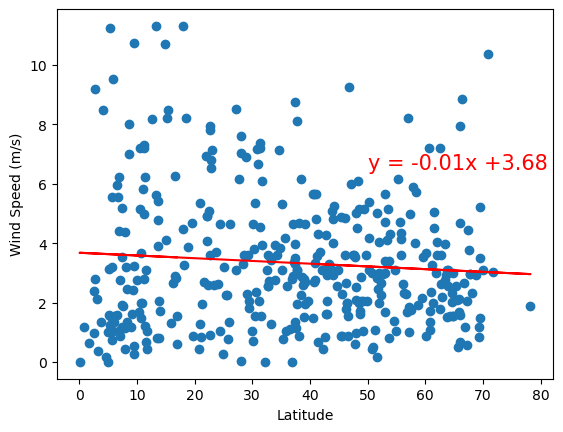

In [28]:
# Northern Hemisphere
line_eq=line_regress_func(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"],"Latitude","Wind Speed (m/s)")
plt.annotate(line_eq,(50,6.5),fontsize=15,color="red")
plt.show()

The r-value is: -0.10080842963426861


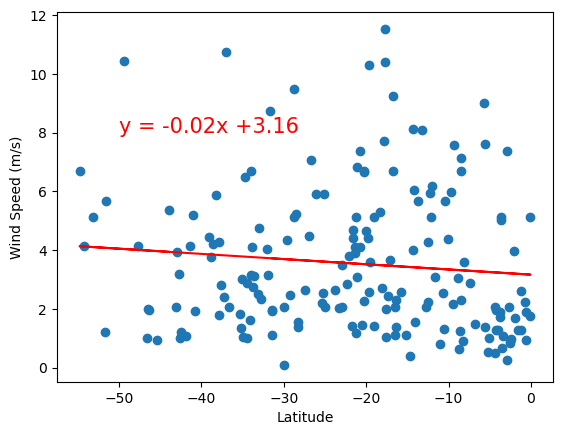

In [30]:
# Southern Hemisphere
line_eq=line_regress_func(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"],"Latitude","Wind Speed (m/s)")
plt.annotate(line_eq,(-50,8),fontsize=15,color="red")
plt.show()

**Discussion about the linear relationship:** 
- There is a very tiny slope and r value (both negative) between Wind Speed and Latitude for both northern and southern hemispheres. Although it appears like cloudiness is decreasing with latitudes in both cases the r^2 values are very small in both cases showing that the line is not a great fit for prediction either